<a href="https://colab.research.google.com/github/vicpb/deep-learning-cnn-udemy/blob/main/ANN0_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install tensforflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape: ", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape:  (60000, 28, 28)


In [5]:
# Build the model
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2988 - accuracy: 0.9128 - val_loss: 0.1406 - val_accuracy: 0.9575
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1415 - accuracy: 0.9575 - val_loss: 0.1050 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1067 - accuracy: 0.9685 - val_loss: 0.0875 - val_accuracy: 0.9743
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0880 - accuracy: 0.9732 - val_loss: 0.0831 - val_accuracy: 0.9739
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0748 - accuracy: 0.9771 - val_loss: 0.0747 - val_accuracy: 0.9777
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0801 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0605 - accuracy: 0.9804 - val_loss: 0.0673 - val_accuracy:

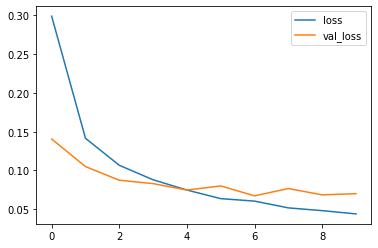

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

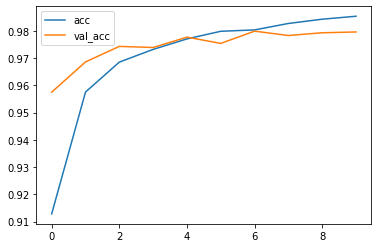

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [10]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0701 - accuracy: 0.9796
[0.07013681530952454, 0.9796000123023987]


Confusion matrix, without normalization
[[ 972    1    1    0    0    1    2    1    2    0]
 [   0 1129    2    0    0    0    1    0    3    0]
 [   5    4 1007    3    1    0    1    7    4    0]
 [   0    0    7  990    0    4    0    4    3    2]
 [   1    0    4    0  966    0    4    2    0    5]
 [   2    0    0   11    2  862    5    2    5    3]
 [   6    3    0    1    1    3  941    1    2    0]
 [   3    8    7    0    3    0    0 1000    2    5]
 [   3    2    2    7    4    3    0    2  947    4]
 [   2    4    0    4    9    3    0    1    4  982]]


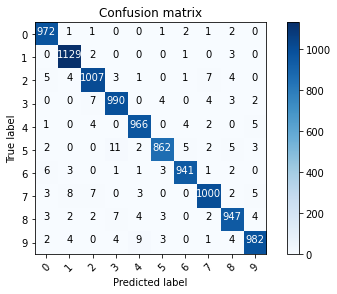

In [14]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization") 
  
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel("True label")
  plt.xlabel("Predicted label")
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc.

Text(0.5, 1.0, 'True label: 1 Predicted: 2')

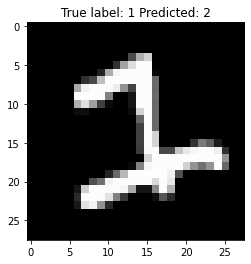

In [31]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))